In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [3]:
df_main = pd.read_csv('hungary_chickenpox.csv')
df_main.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [4]:
df_main.shape

(522, 21)

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

In [6]:
df = df_main[['Date','BUDAPEST']]

In [7]:
df.head()

,Date,BUDAPEST
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96
3,24/01/2005,163
4,31/01/2005,122


In [8]:
df.tail()

,Date,BUDAPEST
517,01/12/2014,95
518,08/12/2014,43
519,15/12/2014,35
520,22/12/2014,30
521,29/12/2014,259


In [9]:
df = df[df['BUDAPEST'] > 0]

In [10]:
df.shape

(521, 2)

In [11]:
df.reset_index(inplace=True,drop=True)

In [12]:
time = pd.date_range(start='1/3/2005',periods=521,freq='W')
df['time_stamp'] = pd.DataFrame(time)
df.drop(['Date'],axis=1,inplace=True)
df = df.set_index('time_stamp')

In [13]:
df.min()

BUDAPEST    2
dtype: int64

In [14]:
df

,BUDAPEST
time_stamp,
2005-01-09,168
2005-01-16,157
2005-01-23,96
2005-01-30,163
2005-02-06,122
...,...
2014-11-30,95
2014-12-07,43
2014-12-14,35


In [15]:
df.head()

,BUDAPEST
time_stamp,
2005-01-09,168
2005-01-16,157
2005-01-23,96
2005-01-30,163
2005-02-06,122


In [16]:
df.tail()

,BUDAPEST
time_stamp,
2014-11-30,95
2014-12-07,43
2014-12-14,35
2014-12-21,30
2014-12-28,259


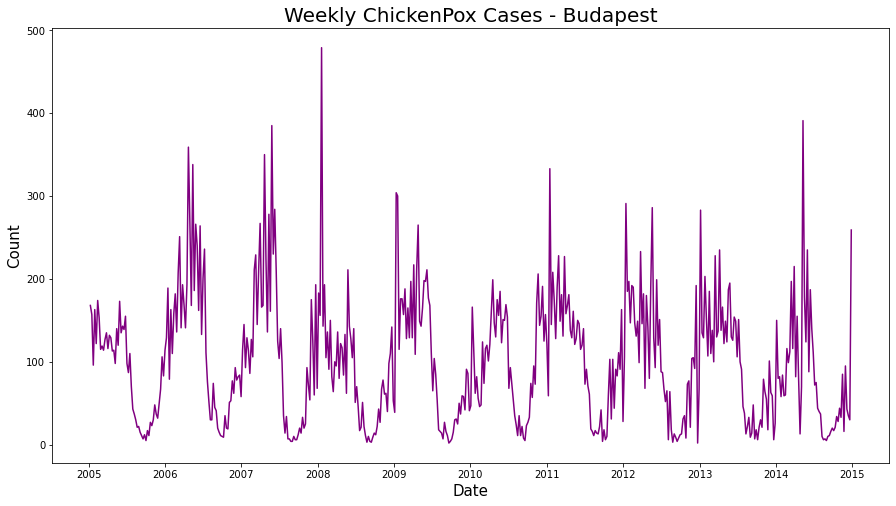

In [17]:
plt.plot(df,color='purple')
plt.title('Weekly ChickenPox Cases - Budapest',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [548]:
plt.rcParams['figure.figsize'] = [15,8]

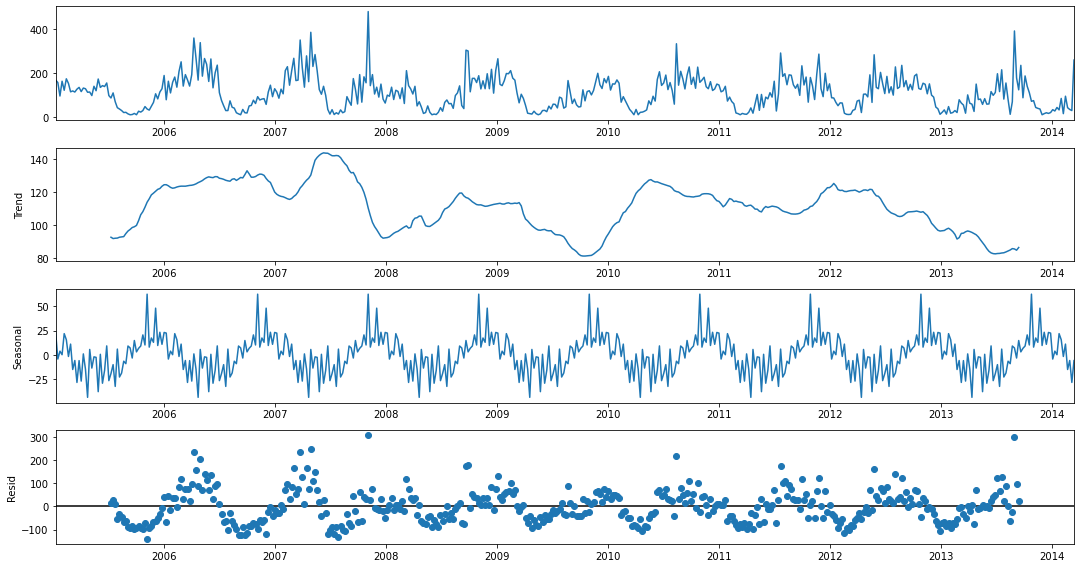

In [36]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

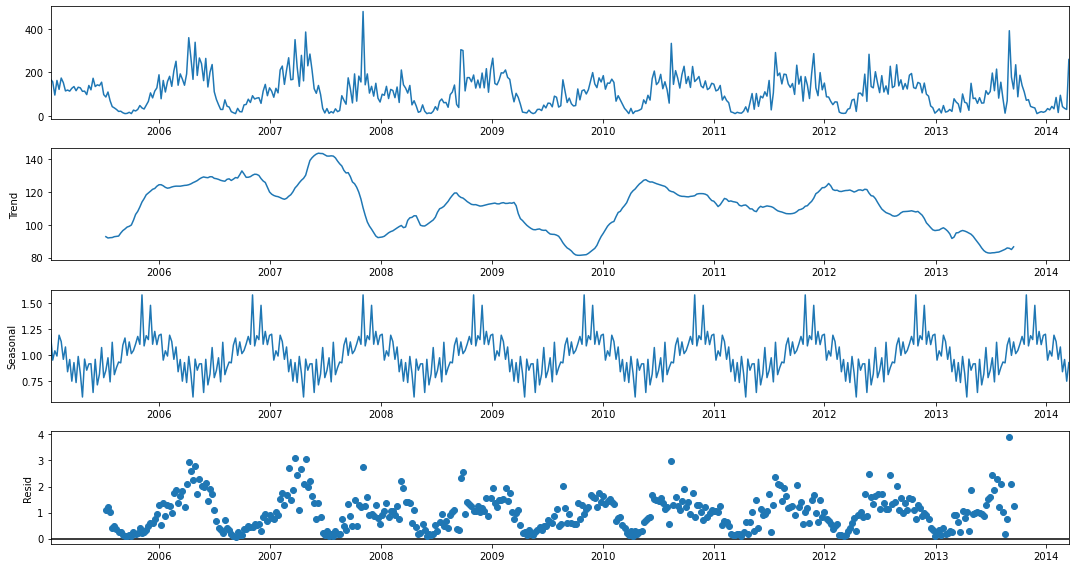

In [37]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

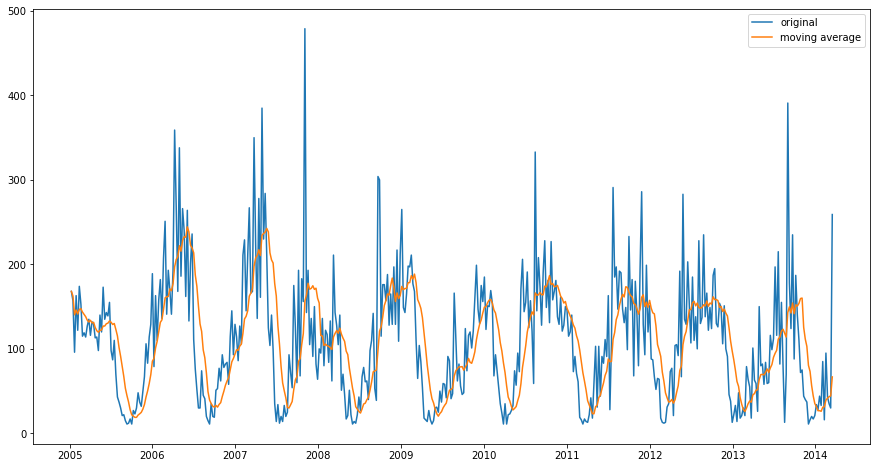

In [38]:
plt.plot(df,label='original')
plt.plot(df.rolling(10,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [39]:
# Model building - Exponential Smoothing Techniques

In [18]:
train = df.iloc[:469]
test = df.iloc[469:]

In [19]:
train.tail()

,BUDAPEST
time_stamp,
2013-12-01,101
2013-12-08,63
2013-12-15,59
2013-12-22,6
2013-12-29,26


In [20]:
test.head()

,BUDAPEST
time_stamp,
2014-01-05,150
2014-01-12,80
2014-01-19,82
2014-01-26,58
2014-02-02,84


In [21]:
len(train)

469

In [22]:
len(test)

52

##### Simple Exponential Smoothing

In [659]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(smoothing_level=0.0417044)
SES_model.summary()

Dep. Variable:,BUDAPEST,No. Observations:,469
Model:,SimpleExpSmoothing,SSE,2546484.440
Optimized:,True,AIC,4037.223
Trend:,None,BIC,4045.524
Seasonal:,None,AICC,4037.309
Seasonal Periods:,None,Date:,"Thu, 31 Mar 2022"
Box-Cox:,False,Time:,02:08:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0417044,alpha,False
initial_level,115.69810,l.0,True


In [660]:
SES_predict = SES_model.forecast(len(test))

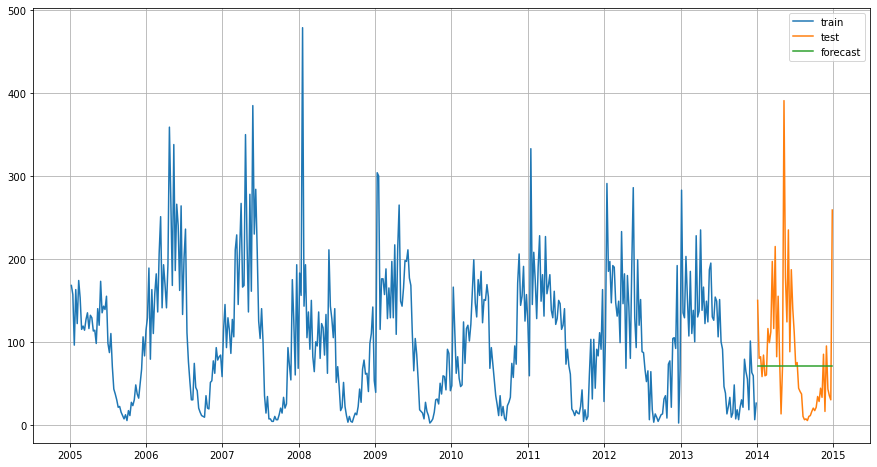

In [661]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [662]:
print("MAE:",MAE(test['BUDAPEST'],SES_predict))
print("MAPE:",MAPE(test['BUDAPEST'],SES_predict))

MAE: 54.63461538461535
MAPE: 172.18341187743926


##### Double Exponential Smoothing

In [696]:
DES = Holt(train,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=0.01292786,
                   smoothing_trend=0.19)
DES_model.summary()

Dep. Variable:,BUDAPEST,No. Observations:,469
Model:,Holt,SSE,3830692.229
Optimized:,True,AIC,4232.730
Trend:,Additive,BIC,4249.333
Seasonal:,None,AICC,4232.912
Seasonal Periods:,None,Date:,"Thu, 31 Mar 2022"
Box-Cox:,False,Time:,02:10:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0129279,alpha,False
smoothing_trend,0.1900000,beta,False


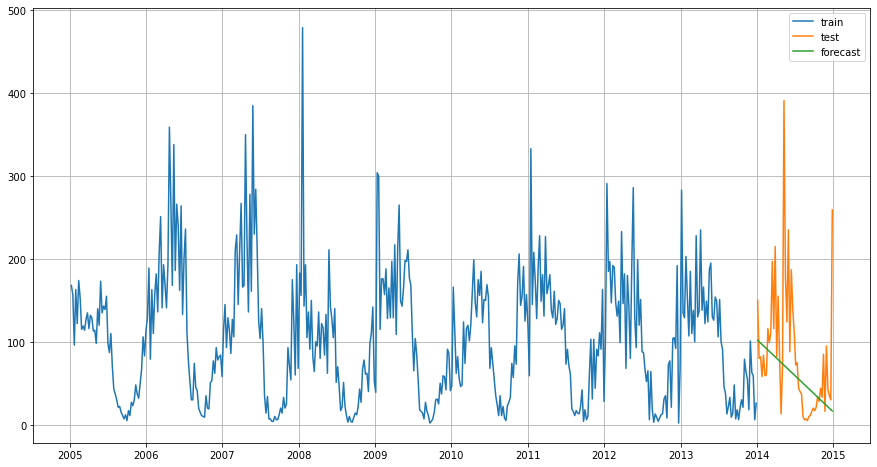

In [697]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [698]:
print("MAE:",MAE(test['BUDAPEST'],DES_predict))
print("MAPE:",MAPE(test['BUDAPEST'],DES_predict))

MAE: 46.92686477748204
MAPE: 107.62298893993305


##### Triple Exponential Smoothing

In [847]:
TES = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.1524538,
                    smoothing_trend=0.00012,
                    smoothing_seasonal=0.189134)
TES_model.summary()

Dep. Variable:,BUDAPEST,No. Observations:,469
Model:,ExponentialSmoothing,SSE,1042969.604
Optimized:,True,AIC,3726.574
Trend:,Multiplicative,BIC,3959.007
Seasonal:,Multiplicative,AICC,3743.266
Seasonal Periods:,52,Date:,"Thu, 31 Mar 2022"
Box-Cox:,False,Time:,02:33:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1524538,alpha,False
smoothing_trend,0.0001200,beta,False


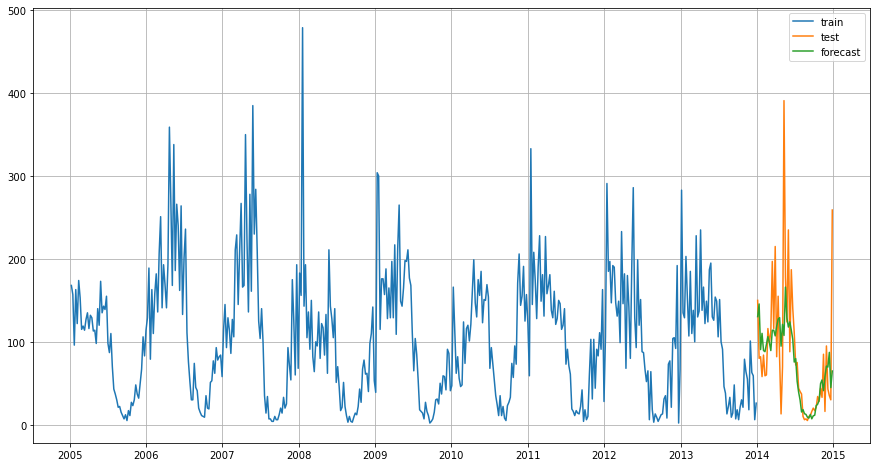

In [848]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [849]:
print("MAE:",MAE(test['BUDAPEST'],TES_predict))
print("MAPE:",MAPE(test['BUDAPEST'],TES_predict))

MAE: 35.481138482279384
MAPE: 57.571215994130945


##### ACF and PACF plots

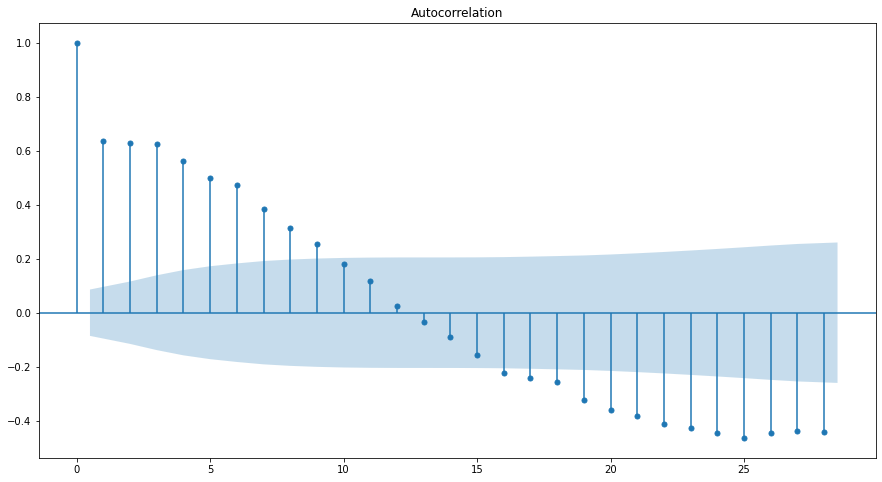

In [850]:
plot_acf(df)
plt.show()

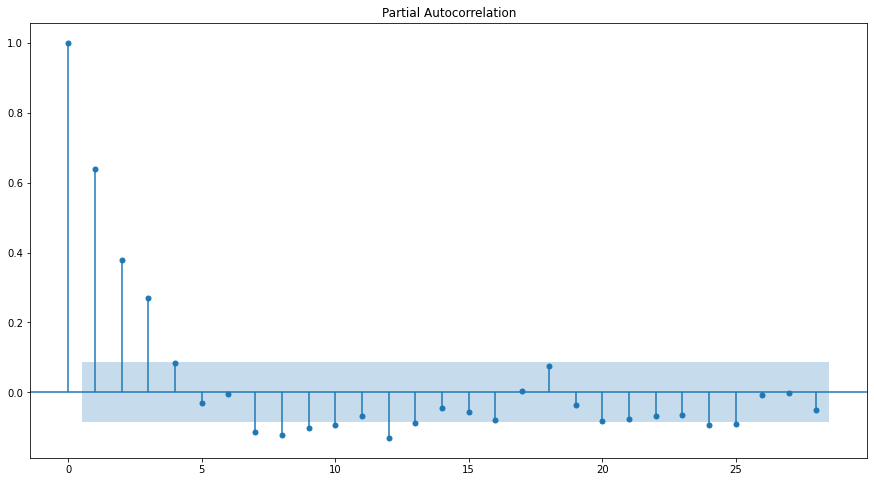

In [851]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [852]:
observations = df.values
df_results = adfuller(observations)
df_results

(-6.947286406975471,
 9.897277704154703e-10,
 12,
 508,
 {'1%': -3.44328828958775,
  '5%': -2.8672462791357867,
  '10%': -2.569809231353463},
 5391.670109825743)

In [469]:
##### Stationary series -- proceed with ARMA model

##### ARMA Model

In [896]:
model=ARMA(train,(4,4))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               BUDAPEST   No. Observations:                  469
Model:                     ARMA(4, 4)   Log Likelihood               -2482.732
Method:                       css-mle   S.D. of innovations             47.895
Date:                Thu, 31 Mar 2022   AIC                           4985.463
Time:                        02:38:01   BIC                           5026.969
Sample:                    01-09-2005   HQIC                          5001.794
                         - 12-29-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            104.1594      3.244     32.105      0.000      97.801     110.518
ar.L1.BUDAPEST     0.8395      0.012     68.955      0.000       0.816       0.863
ar.L2.BUDAPEST     0.2252      0.010

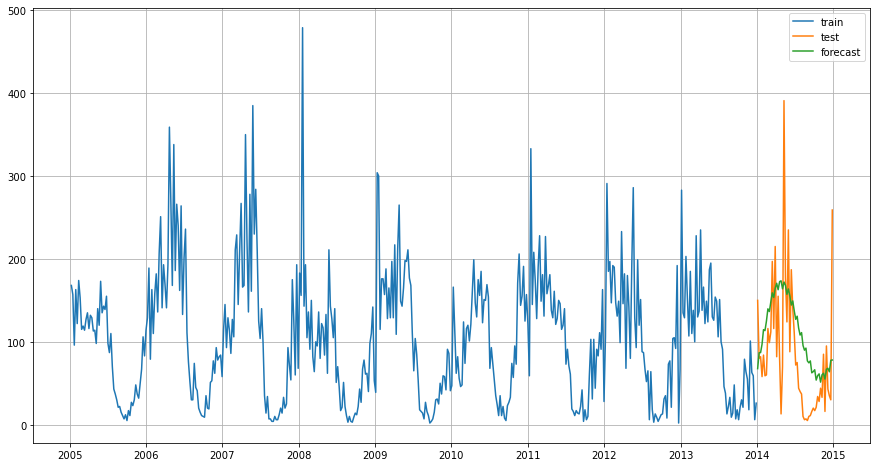

In [897]:
forecasted_values_arma = pd.Series(model_fit.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arma,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [898]:
print("MAE:",MAE(test['BUDAPEST'],forecasted_values_arma))
print("MAPE:",MAPE(test['BUDAPEST'],forecasted_values_arma))

MAE: 54.82633429528286
MAPE: 214.46349664895519


##### SARIMA Model

In [23]:
import itertools
p = q = range(0,4)
d = range(0,1)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],8) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [25]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 0, 0) (0, 0, 0, 8) AIC: 5873.019190949359
SARIMAX (0, 0, 0) (0, 0, 1, 8) AIC: 5517.40916213184
SARIMAX (0, 0, 0) (0, 0, 2, 8) AIC: 5343.766604491915
SARIMAX (0, 0, 0) (0, 0, 3, 8) AIC: 5232.830231263573
SARIMAX (0, 0, 0) (1, 0, 0, 8) AIC: 5382.015438356204
SARIMAX (0, 0, 0) (1, 0, 1, 8) AIC: 5372.584581259924
SARIMAX (0, 0, 0) (1, 0, 2, 8) AIC: 5165.633511858301
SARIMAX (0, 0, 0) (1, 0, 3, 8) AIC: 5082.676490113032
SARIMAX (0, 0, 0) (2, 0, 0, 8) AIC: 5297.380374367891
SARIMAX (0, 0, 0) (2, 0, 1, 8) AIC: 5206.443250941484
SARIMAX (0, 0, 0) (2, 0, 2, 8) AIC: 5167.600608014902
SARIMAX (0, 0, 0) (2, 0, 3, 8) AIC: 5076.743094249605
SARIMAX (0, 0, 0) (3, 0, 0, 8) AIC: 5201.126392386702
SARIMAX (0, 0, 0) (3, 0, 1, 8) AIC: 5054.445486447657
SARIMAX (0, 0, 0) (3, 0, 2, 8) AIC: 5004.868041135613
SARIMAX (0, 0, 0) (3, 0, 3, 8) AIC: 4965.080034198134
SARIMAX (0, 0, 1) (0, 0, 0, 8) AIC: 5562.300366749367
SARIMAX (0, 0, 1) (0, 0, 1, 8) AIC: 5344.262065847953
SARIMAX (0, 0, 1) (0, 0, 2, 8

SARIMAX (2, 0, 1) (2, 0, 0, 8) AIC: 4848.098389527311
SARIMAX (2, 0, 1) (2, 0, 1, 8) AIC: 4848.0829467763015
SARIMAX (2, 0, 1) (2, 0, 2, 8) AIC: 4850.075444153122
SARIMAX (2, 0, 1) (2, 0, 3, 8) AIC: 4770.440848456988
SARIMAX (2, 0, 1) (3, 0, 0, 8) AIC: 4766.703145264784
SARIMAX (2, 0, 1) (3, 0, 1, 8) AIC: 4768.644408406644
SARIMAX (2, 0, 1) (3, 0, 2, 8) AIC: 4770.343963078734
SARIMAX (2, 0, 1) (3, 0, 3, 8) AIC: 4763.28743467367
SARIMAX (2, 0, 2) (0, 0, 0, 8) AIC: 4987.136255261459
SARIMAX (2, 0, 2) (0, 0, 1, 8) AIC: 4908.821847957406
SARIMAX (2, 0, 2) (0, 0, 2, 8) AIC: 4826.724185345539
SARIMAX (2, 0, 2) (0, 0, 3, 8) AIC: 4747.500866364942
SARIMAX (2, 0, 2) (1, 0, 0, 8) AIC: 4918.43871631983
SARIMAX (2, 0, 2) (1, 0, 1, 8) AIC: 4910.203638111958
SARIMAX (2, 0, 2) (1, 0, 2, 8) AIC: 4828.666154140578
SARIMAX (2, 0, 2) (1, 0, 3, 8) AIC: 4749.397587591428
SARIMAX (2, 0, 2) (2, 0, 0, 8) AIC: 4836.130346526478
SARIMAX (2, 0, 2) (2, 0, 1, 8) AIC: 4838.147213961037
SARIMAX (2, 0, 2) (2, 0, 2, 8

In [26]:
df_score.sort_values('aic')[:20]

,param,seasonal,aic
179,"(2, 0, 3)","(0, 0, 3, 8)",4739.440286
115,"(1, 0, 3)","(0, 0, 3, 8)",4740.464919
243,"(3, 0, 3)","(0, 0, 3, 8)",4740.774476
183,"(2, 0, 3)","(1, 0, 3, 8)",4741.297281
119,"(1, 0, 3)","(1, 0, 3, 8)",4742.329934
247,"(3, 0, 3)","(1, 0, 3, 8)",4742.628824
187,"(2, 0, 3)","(2, 0, 3, 8)",4743.084202
123,"(1, 0, 3)","(2, 0, 3, 8)",4744.016512
251,"(3, 0, 3)","(2, 0, 3, 8)",4744.279510
127,"(1, 0, 3)","(3, 0, 3, 8)",4746.009851


In [27]:
model = SARIMAX(train,
                       order = (1,0,3),
                       seasonal_order = (0,0,3,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           BUDAPEST   No. Observations:                  469
Model:             SARIMAX(1, 0, 3)x(0, 0, 3, 12)   Log Likelihood               -2304.504
Date:                            Thu, 31 Mar 2022   AIC                           4625.008
Time:                                    11:55:00   BIC                           4657.500
Sample:                                01-09-2005   HQIC                          4637.839
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9841      0.010     99.929      0.000       0.965       1.003
ma.L1         -0.7149      0.037   

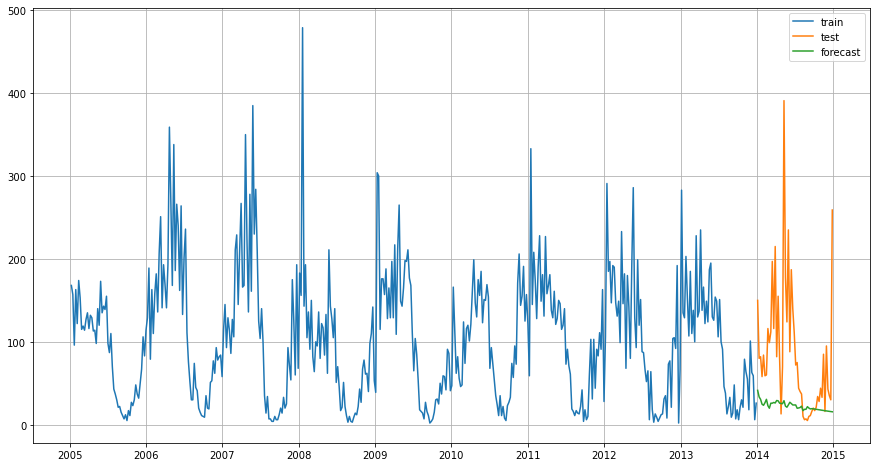

In [28]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [29]:
print("MAE:",MAE(test['BUDAPEST'],forecast))
print("MAPE:",MAPE(test['BUDAPEST'],forecast))

MAE: 64.8179937438509
MAPE: 74.13013607112075


In [30]:
model = SARIMAX(train,
                       order = (3,0,3),
                       seasonal_order = (3,0,3,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           BUDAPEST   No. Observations:                  469
Model:             SARIMAX(3, 0, 3)x(3, 0, 3, 12)   Log Likelihood               -2301.271
Date:                            Thu, 31 Mar 2022   AIC                           4628.543
Time:                                    11:55:50   BIC                           4681.341
Sample:                                01-09-2005   HQIC                          4649.393
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4763      0.503      0.947      0.344      -0.510       1.462
ar.L2          0.2782      0.550   

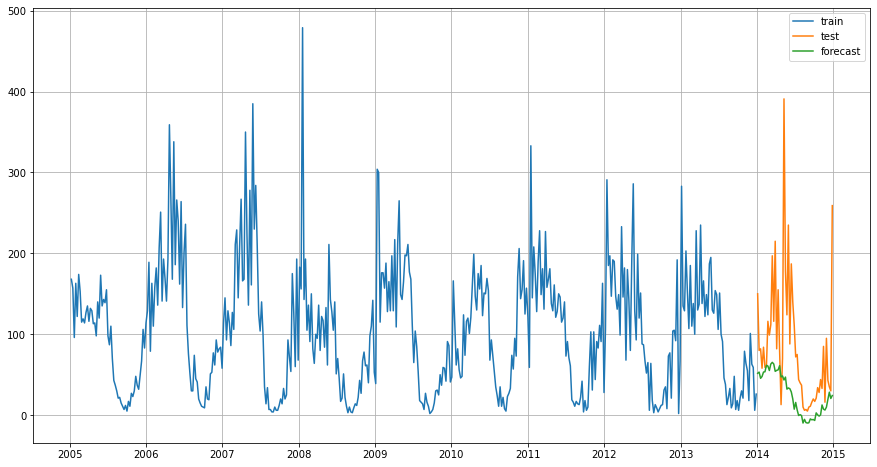

In [31]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [32]:
print("MAE:",MAE(test['BUDAPEST'],forecast))
print("MAPE:",MAPE(test['BUDAPEST'],forecast))

MAE: 59.950326032875225
MAPE: 88.4943242226355


In [33]:
model = SARIMAX(train,
                       order = (7,0,9),
                       seasonal_order = (7,0,9,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           BUDAPEST   No. Observations:                  469
Model:             SARIMAX(7, 0, 9)x(7, 0, 9, 12)   Log Likelihood               -1871.877
Date:                            Thu, 31 Mar 2022   AIC                           3809.753
Time:                                    11:58:30   BIC                           3937.159
Sample:                                01-09-2005   HQIC                          3860.460
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6536      0.548      1.192      0.233      -0.421       1.728
ar.L2         -0.2177      0.474   

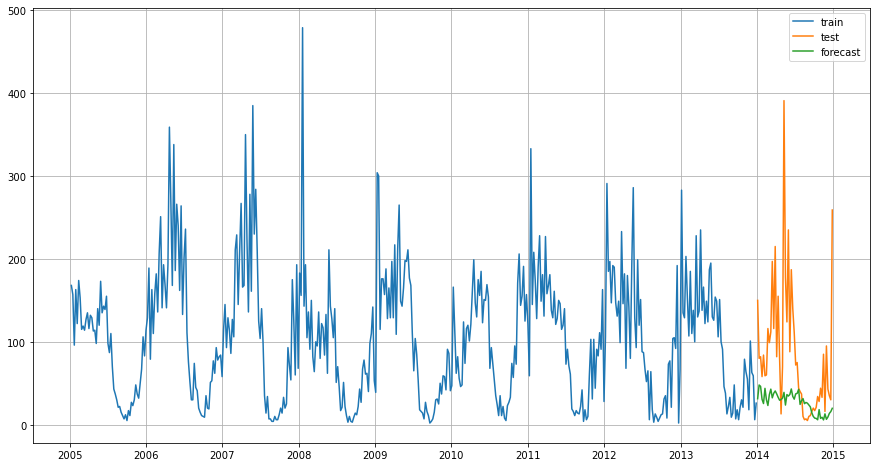

In [34]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [35]:
print("MAE:",MAE(test['BUDAPEST'],forecast))
print("MAPE:",MAPE(test['BUDAPEST'],forecast))

MAE: 61.96250385338734
MAPE: 83.88185090200592


In [36]:
model = SARIMAX(train,
                       order = (9,0,9),
                       seasonal_order = (9,0,9,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           BUDAPEST   No. Observations:                  469
Model:             SARIMAX(9, 0, 9)x(9, 0, 9, 12)   Log Likelihood               -1864.112
Date:                            Thu, 31 Mar 2022   AIC                           3802.223
Time:                                    12:02:28   BIC                           3945.072
Sample:                                01-09-2005   HQIC                          3859.076
                                     - 12-29-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6887      0.378      1.820      0.069      -0.053       1.430
ar.L2         -0.0009      0.464   

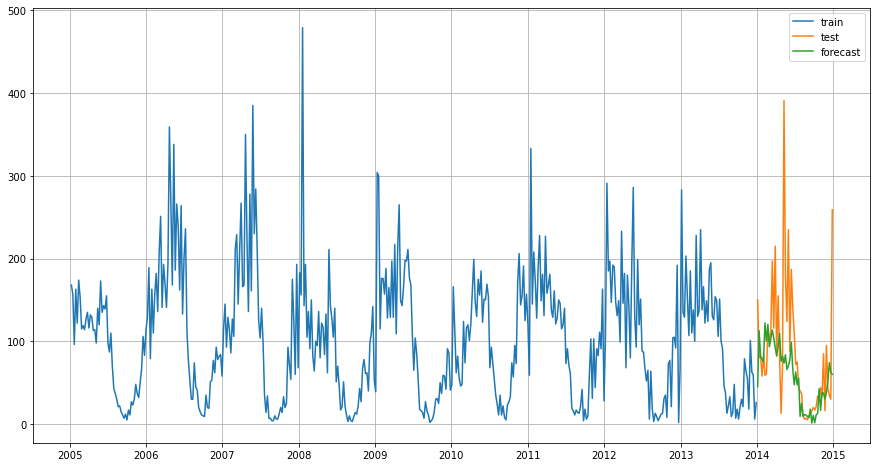

In [37]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [38]:
print("MAE:",MAE(test['BUDAPEST'],forecast))
print("MAPE:",MAPE(test['BUDAPEST'],forecast))

MAE: 41.85489523387295
MAPE: 56.96513959857861
